 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/NotebooksPython101"><img src = "https://ibm.box.com/shared/static/yfe6h4az47ktg2mm9h05wby2n7e8kei3.png" width = 750, align = "center"></a>


<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Deeper Neural Networks with nn.ModuleList()
 </font></h1> 

# Table of Contents
In this lab, you will go over the basics of tensor operations 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper Functions  </a></li>
<li><a href="#ref1">Neural  Network Module and Function for Training</a></li>
<li><a href="#ref2"> Train and Validate the Model  <a></li>
<li><a href="#ref3">Practice Question</a></li>


<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>


You'll need the following libraries:  

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
torch.manual_seed(1)

<a id="ref0"></a>

<h2> Helper Functions </h2>
    

Functions used to plot:

In [2]:
def plot_decision_regions_3class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min()-0.1 , X[:, 0].max()+0.1 
    y_min, y_max = X[:, 1].min()-0.1 , X[:, 1].max() +0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:]==0,0],X[y[:]==0,1],'ro',label='y=0')
    plt.plot(X[y[:]==1,0],X[y[:]==1,1],'go',label='y=1')
    plt.plot(X[y[:]==2,0],X[y[:]==2,1],'o',label='y=2')
    plt.title("decision region")
    plt.legend()

dataset object 

In [3]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    #  modified from: http://cs231n.github.io/neural-networks-case-study/
    def __init__(self,K=3,N=500):
        D = 2
        X = np.zeros((N*K,D)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N*j,N*(j+1))
          r = np.linspace(0.0,1,N) # radius
          t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
          X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
          y[ix] = j
    
        self.y=torch.from_numpy(y).type(torch.LongTensor)
        self.x=torch.from_numpy(X).type(torch.FloatTensor)
        self.len=y.shape[0]
        
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    def plot_stuff(self):
        plt.plot(self.x[self.y[:]==0,0].numpy(),self.x[self.y[:]==0,1].numpy(),'o',label="y=0")
        plt.plot(self.x[self.y[:]==1,0].numpy(),self.x[self.y[:]==1,1].numpy(),'ro',label="y=1")
        plt.plot(self.x[self.y[:]==2,0].numpy(),self.x[self.y[:]==2,1].numpy(),'go',label="y=2")
        plt.legend()

<a id='ref1'> </a>

<h2>Neural  Network Module and Function for Training   </h2>

Neural Network Module using  <code> ModuleList() </code>

In [5]:
class Net(nn.Module):
    def __init__(self,Layers):
        super(Net,self).__init__()
        self.hidden = nn.ModuleList()

        for input_size,output_size in zip(Layers,Layers[1:]):
            self.hidden.append(nn.Linear(input_size,output_size))
        
    def forward(self,activation):
        L=len(self.hidden)
        for (l,linear_transform)  in zip(range(L),self.hidden):
            if l<L-1:
                activation =F.relu(linear_transform(activation))
           
            else:
                activation =linear_transform(activation)
        
        return activation

A function used to train. 

In [6]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=100):
    LOSS=[]
    ACC=[]
    for epoch in range(epochs):
        for x,y in train_loader:
            optimizer.zero_grad()
        
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        LOSS.append(loss.item())
        ACC.append(accuracy(model,data_set))
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch',color=color)
    ax1.set_ylabel('total loss',color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot( ACC, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()
    return LOSS

A function used to calculate accuracy 

In [7]:
def accuracy(model,data_set):
    _,yhat=torch.max(model(data_set.x),1)
    return (yhat==data_set.y).numpy().mean()

<a id="ref2"></a>
<h2>Train and Validate the Model </h2>

In [11]:
data_set.y.dtype

torch.int64

Crate a dataset object:

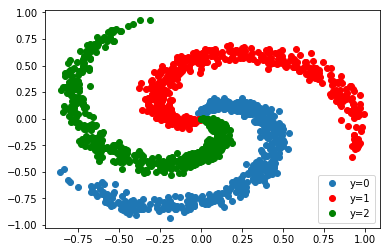

In [9]:
data_set=Data()
data_set.plot_stuff()
data_set.y=data_set.y.view(-1)

Create a  network to classify three classes with 1 hidden layer with 50 neurons 

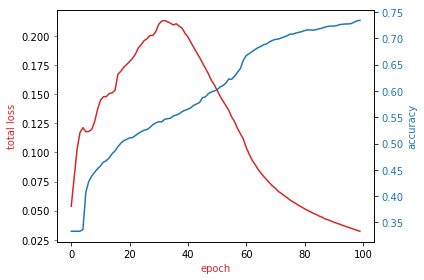

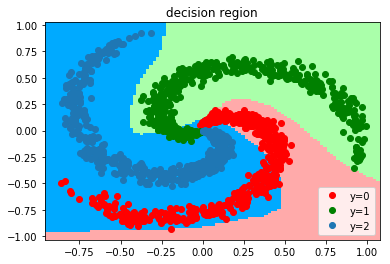

In [12]:
Layers=[2,50,3]
model=Net(Layers)
learning_rate=0.10

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=20)

criterion=nn.CrossEntropyLoss()
LOSS=train(data_set,model,criterion, train_loader, optimizer, epochs=100)

plot_decision_regions_3class(model,data_set)

Create a  network to classify three classes with 2 hidden layer with 20 neurons 

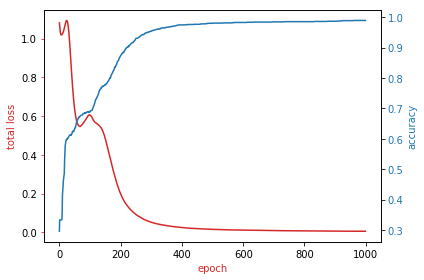

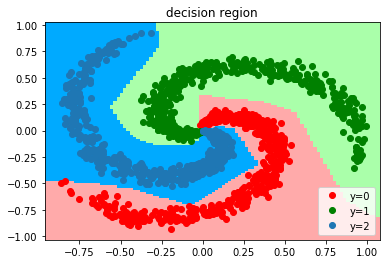

In [13]:
Layers=[2,10,10,3]
model=Net(Layers)
learning_rate=0.01

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=20)

criterion=nn.CrossEntropyLoss()
LOSS=train(data_set,model,criterion, train_loader, optimizer, epochs=1000)
plot_decision_regions_3class(model,data_set)

<a id='ref3'></a>
<h2>Practice Question<h2>

## create a network with three hidden layers each with ten neurons, then train the network using the same process as above 

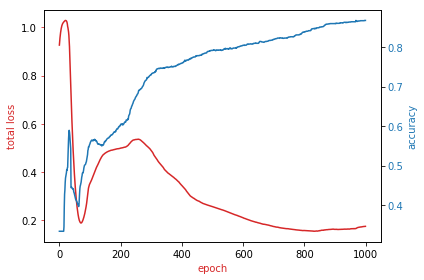

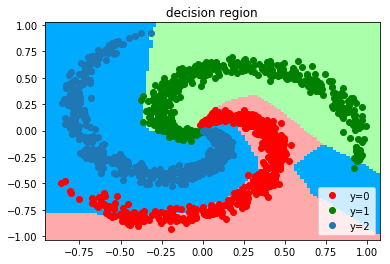

In [18]:
Layers=[2,10,10,10,3]
model=Net(Layers)
learning_rate=0.01

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay = 0.005)
train_loader=DataLoader(dataset=data_set,batch_size=20)

criterion=nn.CrossEntropyLoss()
LOSS=train(data_set,model,criterion, train_loader, optimizer, epochs=1000)
plot_decision_regions_3class(model,data_set)

Double-click __here__ for the solution.

<!-- 
Layers=[2,10,10,10,3]
model=Net(Layers)
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=20)
criterion=nn.CrossEntropyLoss()
LOSS=train(data_set,model,criterion, train_loader, optimizer, epochs=1000)
plot_decision_regions_3class(model,data_set
-->

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).